In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/sample_data1.csv")
df.sample(5)
df.shape




(7043, 21)

In [ ]:
df.drop('customerID',axis='columns', inplace=True)
df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape


(11, 20)

In [ ]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [ ]:
df = df[df.TotalCharges!= ' ']
df.shape


(7032, 20)

In [ ]:
df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

<ipython-input-104-031a1f7ba248>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

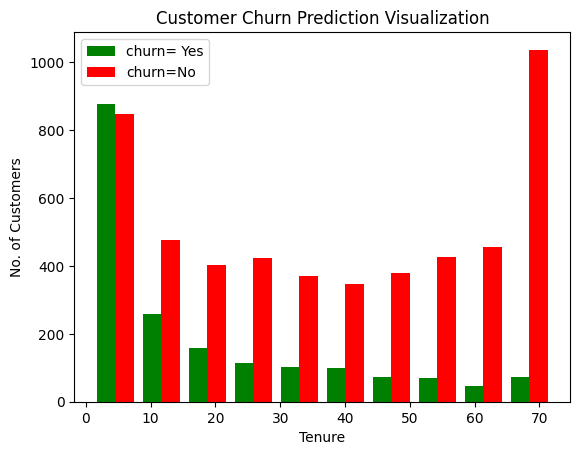

In [ ]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.title("Customer Churn Prediction Visualization")
plt.xlabel("Tenure")
plt.ylabel("No. of Customers")


plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'],label=['churn= Yes',"churn=No"])
plt.legend()

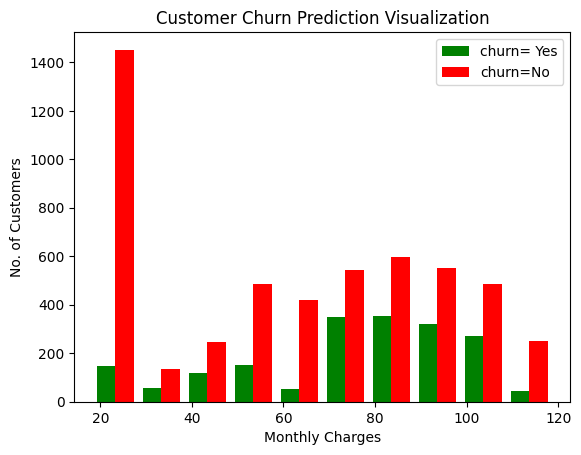

In [ ]:
tenure_churn_no = df[df.Churn=='No'].MonthlyCharges
tenure_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

plt.title("Customer Churn Prediction Visualization")
plt.xlabel("Monthly Charges")
plt.ylabel("No. of Customers")


plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'],label=['churn= Yes',"churn=No"])
plt.legend()

In [ ]:
def print_unique_col_values(df):
  for column in df :
    if df[column].dtypes == 'object':
      print(f"{column} : {df[column].unique()}")

In [ ]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
yes_no_columns = ['Partner', 'Dependents','PhoneService', 'MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport','StreamingTV', 'StreamingMovies',
                  'PaperlessBilling','Churn']
for col in yes_no_columns:
  df[col].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
df.columns

print_unique_col_values(df)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df['gender'].replace({'Female':1,'Male':0 }, inplace=True)
df['gender'].unique()

array([1, 0])

In [ ]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
print_unique_col_values(df)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
# performing one hot encoding on contract and paymentmethod columns.
df = pd.get_dummies(df, columns=['Contract'], prefix=['Contract'])
df[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']] = df[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']].astype(int)

df = pd.get_dummies(df, columns=['PaymentMethod'], prefix=['PaymentMethod'])
df[['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']] = df[['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].astype(int)
df.head()





,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,DSL,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,DSL,1,0,...,56.95,1889.50,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,DSL,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,DSL,1,0,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [ ]:
print_unique_col_values(df)

InternetService : ['DSL' 'Fiber optic' 'No']


In [ ]:
df = pd.get_dummies(df, columns=['InternetService'], prefix=['InternetService'])
df[['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No']] = df[['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No']].astype(int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
df.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      int64
Contract_One year                            int64
Contract_Two year              

In [ ]:
df[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']] = df[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']].astype(int)

df[['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']] = df[['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].astype(int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      int64
Contract_One year                            int64
Contract_Two year              

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
# normalization of data

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
321,1,0,1,1,1.000000,0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
4194,1,0,1,0,0.985915,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4002,0,0,1,1,1.000000,1,1,1,1,1,...,0,0,1,1,0,0,0,1,0,0
4211,0,1,0,0,0.323944,1,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
5828,1,0,1,1,1.000000,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      int64
Contract_One year                            int64
Contract_Two year              

In [ ]:
for col in df :
  print(f"{col}: {df[col].unique}")

gender: <bound method Series.unique of 0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64>
SeniorCitizen: <bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7032, dtype: int64>
Partner: <bound method Series.unique of 0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7032, dtype: int64>
Dependents: <bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7032, dtype: int64>
tenure: <bound method Series.unique of 0       0.000000
1       0.464789
2       0.014085
3       0.619718
4       0.014085
          ...   
7038    0.323944
7039    1.000000
7040    0.140845
7041    0.042254
704

In [ ]:
x = df.drop('Churn',axis='columns')
y = df['Churn']
print(x)
print(y)


      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          1              0        1           0  0.000000             0   
1          0              0        0           0  0.464789             1   
2          0              0        0           0  0.014085             1   
3          0              0        0           0  0.619718             0   
4          1              0        0           0  0.014085             1   
...      ...            ...      ...         ...       ...           ...   
7038       0              0        1           1  0.323944             1   
7039       1              0        1           1  1.000000             1   
7040       1              0        1           1  0.140845             0   
7041       0              1        1           0  0.042254             1   
7042       0              0        0           0  0.915493             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0          

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
x_train.shape


(5625, 26)

In [ ]:
x_test.shape

(1407, 26)

In [ ]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
5664,1,1,0,0,0.126761,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2621,0,0,1,0,0.985915,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
len(x_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(20, input_shape=(26,), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.6988
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.7884
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7966
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8007
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8039
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8084
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8096
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.8112
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4071 - accura

In [ ]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.7761


[0.4557338058948517, 0.7761194109916687]

In [ ]:
yp = model.predict(x_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.18386458],
       [0.6018062 ],
       [0.01457641],
       [0.783513  ],
       [0.51786023]], dtype=float32)

In [ ]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [ ]:
y_pred = []

for element in yp:
  if element >0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:5]

[0, 1, 0, 1, 1]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.64      0.52      0.57       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

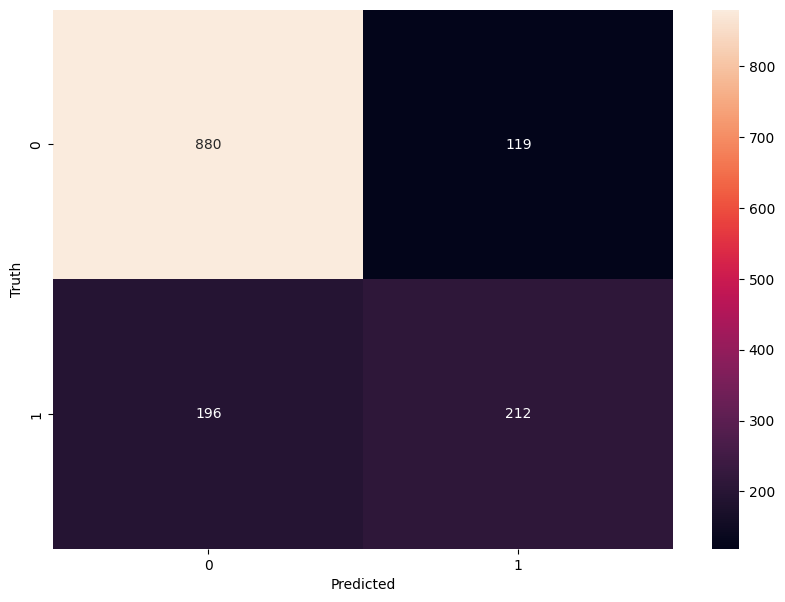

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
round((880+119)/(880+119+212+196),2)

0.71